* The objective of the IMDB sentiment analysis Kaggle competition is to develop a model that can accurately predict the sentiment of movie reviews.The goal is to create models that generalize well to unseen data and achieve high accuracy in sentiment classification.

In [3]:
import numpy as np
import pandas as pd
import nltk

In [4]:
data= pd.read_csv(r'D:\NLP\IMDB Dataset.csv')

In [5]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data.shape

(50000, 2)

In [7]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
data['review'].mode()

0    Loved today's show!!! It was a variety and not...
Name: review, dtype: object

In [10]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [11]:
# Distribution of sentiments via countplot

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

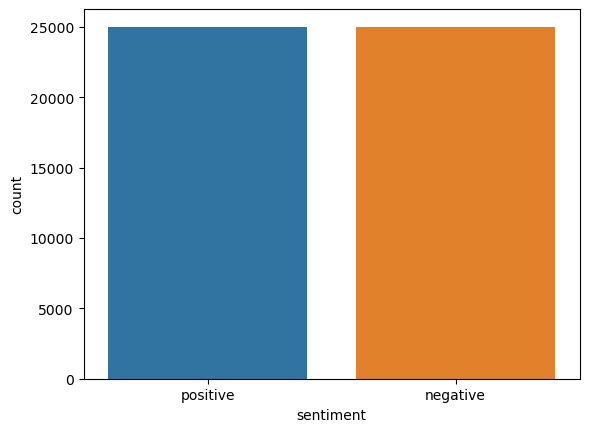

In [12]:
import seaborn as sns
sns.countplot(data['sentiment'])

In [13]:
data.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [14]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['sentiment']= le.fit_transform(data['sentiment'])

# Test preparation

## 1) Removing html tags

In [15]:
import re
def striphtml(df):
    p= re.compile(r'<.*?>')
    return p.sub('',df)

In [16]:
data['review']= data['review'].apply(striphtml)

In [17]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## 2) Lower casing

In [18]:
data['review']= data['review'].str.lower()

In [19]:
data['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

## 3) Removing Punctutaions

In [20]:
import string, time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
exclude= string.punctuation

In [22]:
def remove_punc(text):
    for char in exclude:
        text= text.replace(char,'')
    return text

In [23]:
data['review']= data['review'].apply(remove_punc)

In [24]:
data['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

## 4) Removing stopwords

In [25]:
from nltk.corpus import stopwords

In [26]:
sw= stopwords.words('English')
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
def remove_stopwords(text):
    new_text= []
    
    for i in text.split():
        if i in sw:
            new_text.append('')
        else:
            new_text.append(i)
    x= new_text[:]
    new_text.clear()
    return ' '.join(x)

In [28]:
data['review']= data['review'].apply(remove_stopwords)

In [29]:
data['review'].head()

0    one    reviewers  mentioned   watching  1 oz e...
1     wonderful little production  filming techniqu...
2     thought    wonderful way  spend time    hot s...
3    basically theres  family   little boy jake thi...
4    petter matteis love   time  money   visually s...
Name: review, dtype: object

## 5) Tokenization & Stemming

In [30]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [31]:
nltk.download('punkt')

# Initialize the Porter stemmer
stemmer = PorterStemmer()


# Tokenize and stem each document in the dataset
stemmed_data = []
for document in data['review']:
    # Tokenize the document into words
    words = word_tokenize(document)
    # Stem each word and join them back into a sentence
    stemmed_document = ' '.join([stemmer.stem(word) for word in words])
    stemmed_data.append(stemmed_document)

# Convert the stemmed data into a DataFrame (optional)
stemmed_df = pd.DataFrame(stemmed_data, columns=["Stemmed_Text"])

# Print the stemmed data
print(stemmed_df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                            Stemmed_Text
0      one review mention watch 1 oz episod youll hoo...
1      wonder littl product film techniqu unassum old...
2      thought wonder way spend time hot summer weeke...
3      basic there famili littl boy jake think there ...
4      petter mattei love time money visual stun film...
...                                                  ...
49995  thought movi right good job wasnt creativ orig...
49996  bad plot bad dialogu bad act idiot direct anno...
49997  cathol taught parochi elementari school nun ta...
49998  im go disagre previou comment side maltin one ...
49999  one expect star trek movi high art fan expect ...

[50000 rows x 1 columns]


In [32]:
data['sentiment']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int32

In [33]:
stemmed_df['sentiment']= data['sentiment']


In [34]:
stemmed_df.head()

,Stemmed_Text,sentiment
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1


In [35]:
stemmed_df['Stemmed_Text'][0]

'one review mention watch 1 oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom c

# Text Representation

## Apply TfidfVectorizer to make text data into vectors

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=500)
X= cv.fit_transform(stemmed_df['Stemmed_Text']).toarray()

In [37]:
X

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [38]:
X.shape

(50000, 500)

In [39]:
y= stemmed_df['sentiment']
y.shape

(50000,)

# Train and Test Split

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,y,random_state=1,test_size=0.2)

In [41]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(40000, 500)
(40000,)
(10000, 500)
(10000,)


# Model Building

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, accuracy_score

In [43]:
lr= LogisticRegression()
model= lr.fit(xtrain,ytrain)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
pred= lr.predict(xtest)

In [47]:
# Evaluation Metrics
print(accuracy_score(ytest,pred))
print(cohen_kappa_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

0.8455
0.6910897075489277
[[4167  877]
 [ 668 4288]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      5044
           1       0.83      0.87      0.85      4956

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# Naive Bayes

In [48]:
from sklearn.naive_bayes import MultinomialNB

In [49]:
mnb= MultinomialNB()
mnb.fit(xtrain,ytrain)

MultinomialNB()

In [50]:
# predict the model
pred= mnb.predict(xtest)

In [51]:
# Evaluation metrics
print(accuracy_score(ytest,pred))
print(cohen_kappa_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

0.8181
0.6362480152619854
[[4075  969]
 [ 850 4106]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      5044
           1       0.81      0.83      0.82      4956

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score,accuracy_score,recall_score,precision_score,roc_curve,classification_report

In [56]:
params= {'criterion':['gini','entropy'],'max_depth':[5,10,15,20]}

In [57]:
gd= GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params,scoring='accuracy')

In [58]:
gd.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20]},
             scoring='accuracy')

In [59]:
gd.best_params_

{'criterion': 'gini', 'max_depth': 15}

In [60]:
dt= DecisionTreeClassifier(criterion='gini',max_depth=15)
model2= dt.fit(xtrain,ytrain)
pred2= dt.predict(xtest)

In [61]:
print(accuracy_score(ytest,pred2))
print(cohen_kappa_score(ytest,pred2))
print(classification_report(ytest,pred2))

0.7372
0.4752478315834673
              precision    recall  f1-score   support

           0       0.80      0.64      0.71      5044
           1       0.70      0.83      0.76      4956

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.73     10000



# KNeighbors Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
kn= KNeighborsClassifier()
kn.fit(xtrain,ytrain)
pred= kn.predict(xtest)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [54]:
# Evaluation metrics
print(accuracy_score(ytest,pred))
print(cohen_kappa_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

0.6615
0.32364637762982673
[[3058 1986]
 [1399 3557]]
              precision    recall  f1-score   support

           0       0.69      0.61      0.64      5044
           1       0.64      0.72      0.68      4956

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



* Logistic Regression is performing well in this dataset as the evaluation metrics of that particular is giving us the better results than any other algorithms that we have applied